In [1]:
import pandas as pd

In [2]:
!pip install gdown

In [3]:
import gdown

# Replace '1cu2luEltPd_mjDvxadzHOLXww1PNrvji' with your file's ID
file_id = "1cu2luEltPd_mjDvxadzHOLXww1PNrvji"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file to your current directory
output = "sales.csv"
gdown.download(url, output, quiet=False)


df = pd.read_csv(output)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1cu2luEltPd_mjDvxadzHOLXww1PNrvji
To: /content/sales.csv
100%|██████████| 1.07M/1.07M [00:00<00:00, 50.7MB/s]


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,02-03-2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,06-03-2022 10:33,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,04-03-2022 17:20,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,02-03-2022 17:23,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,05-03-2022 14:32,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("Solarize_Light2")
#sns.set_palette("dark")
#sns.set_style("ticks")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [6]:
df.shape


(7829, 9)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [15]:
top = df["category"].value_counts().head(15) #plotting
least=df["category"].value_counts().tail(15) #   ''

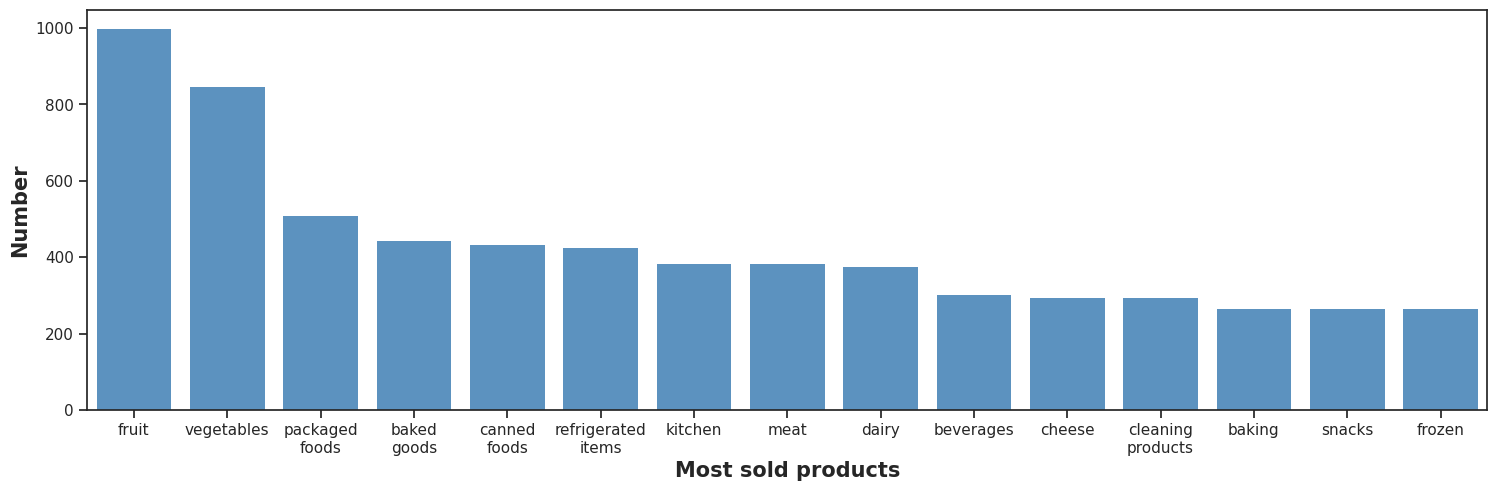

In [16]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)



# Remove the 'data=df' parameter and let seaborn work with top.index and top.values directly
sns.barplot(x=top.index, y=top.values,
            linewidth=0,
            alpha=1.0,
            color="#4b94cf")

#format axis
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')

wrap_labels(ax, 10)

plt.show()

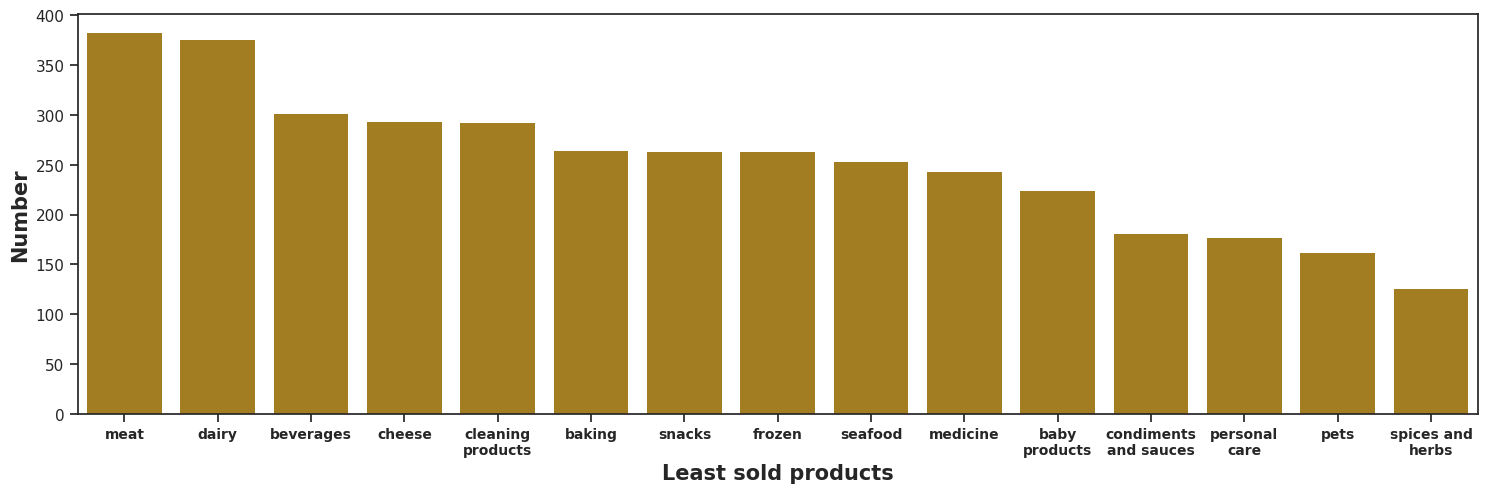

In [17]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

# Remove 'data=df' as it's causing the mismatch
sns.barplot(x=least.index, y=least.values, linewidth=0, alpha=1.0, color="darkgoldenrod") # Pass x and y directly
sns.set(style="ticks")

#format axis
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
plt.xticks(fontsize=10, weight="semibold")


wrap_labels(ax, 10)
fig.show()

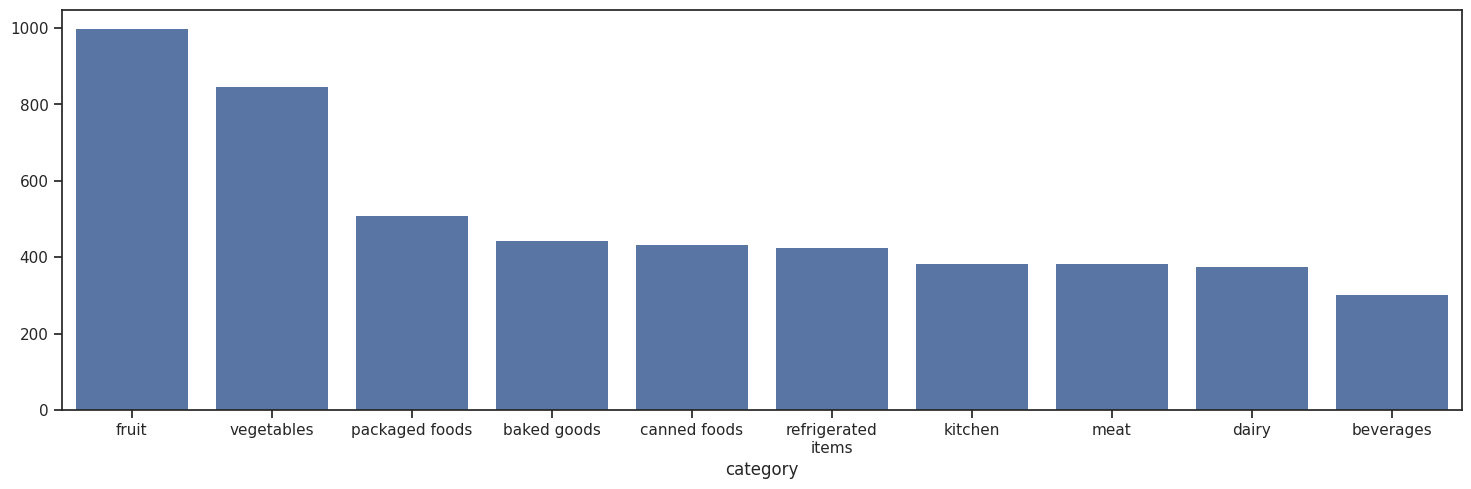

In [22]:
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_axes([0,0,1,1])
sns.barplot(x=df["category"].value_counts()[:10].index, y=df["category"].value_counts()[:10].values,
            linewidth=0,  # Keep linewidth and other parameters
            alpha=1.0,
            color="b")  # Keep color

wrap_labels(ax2,10)

<Axes: xlabel='customer_type', ylabel='Count'>

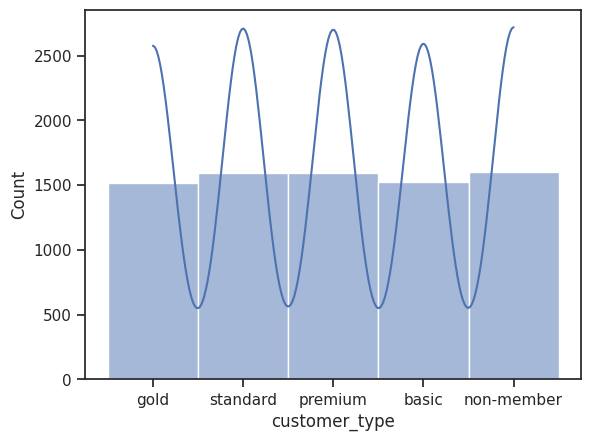

In [23]:
sns.histplot(df.customer_type,kde=True)

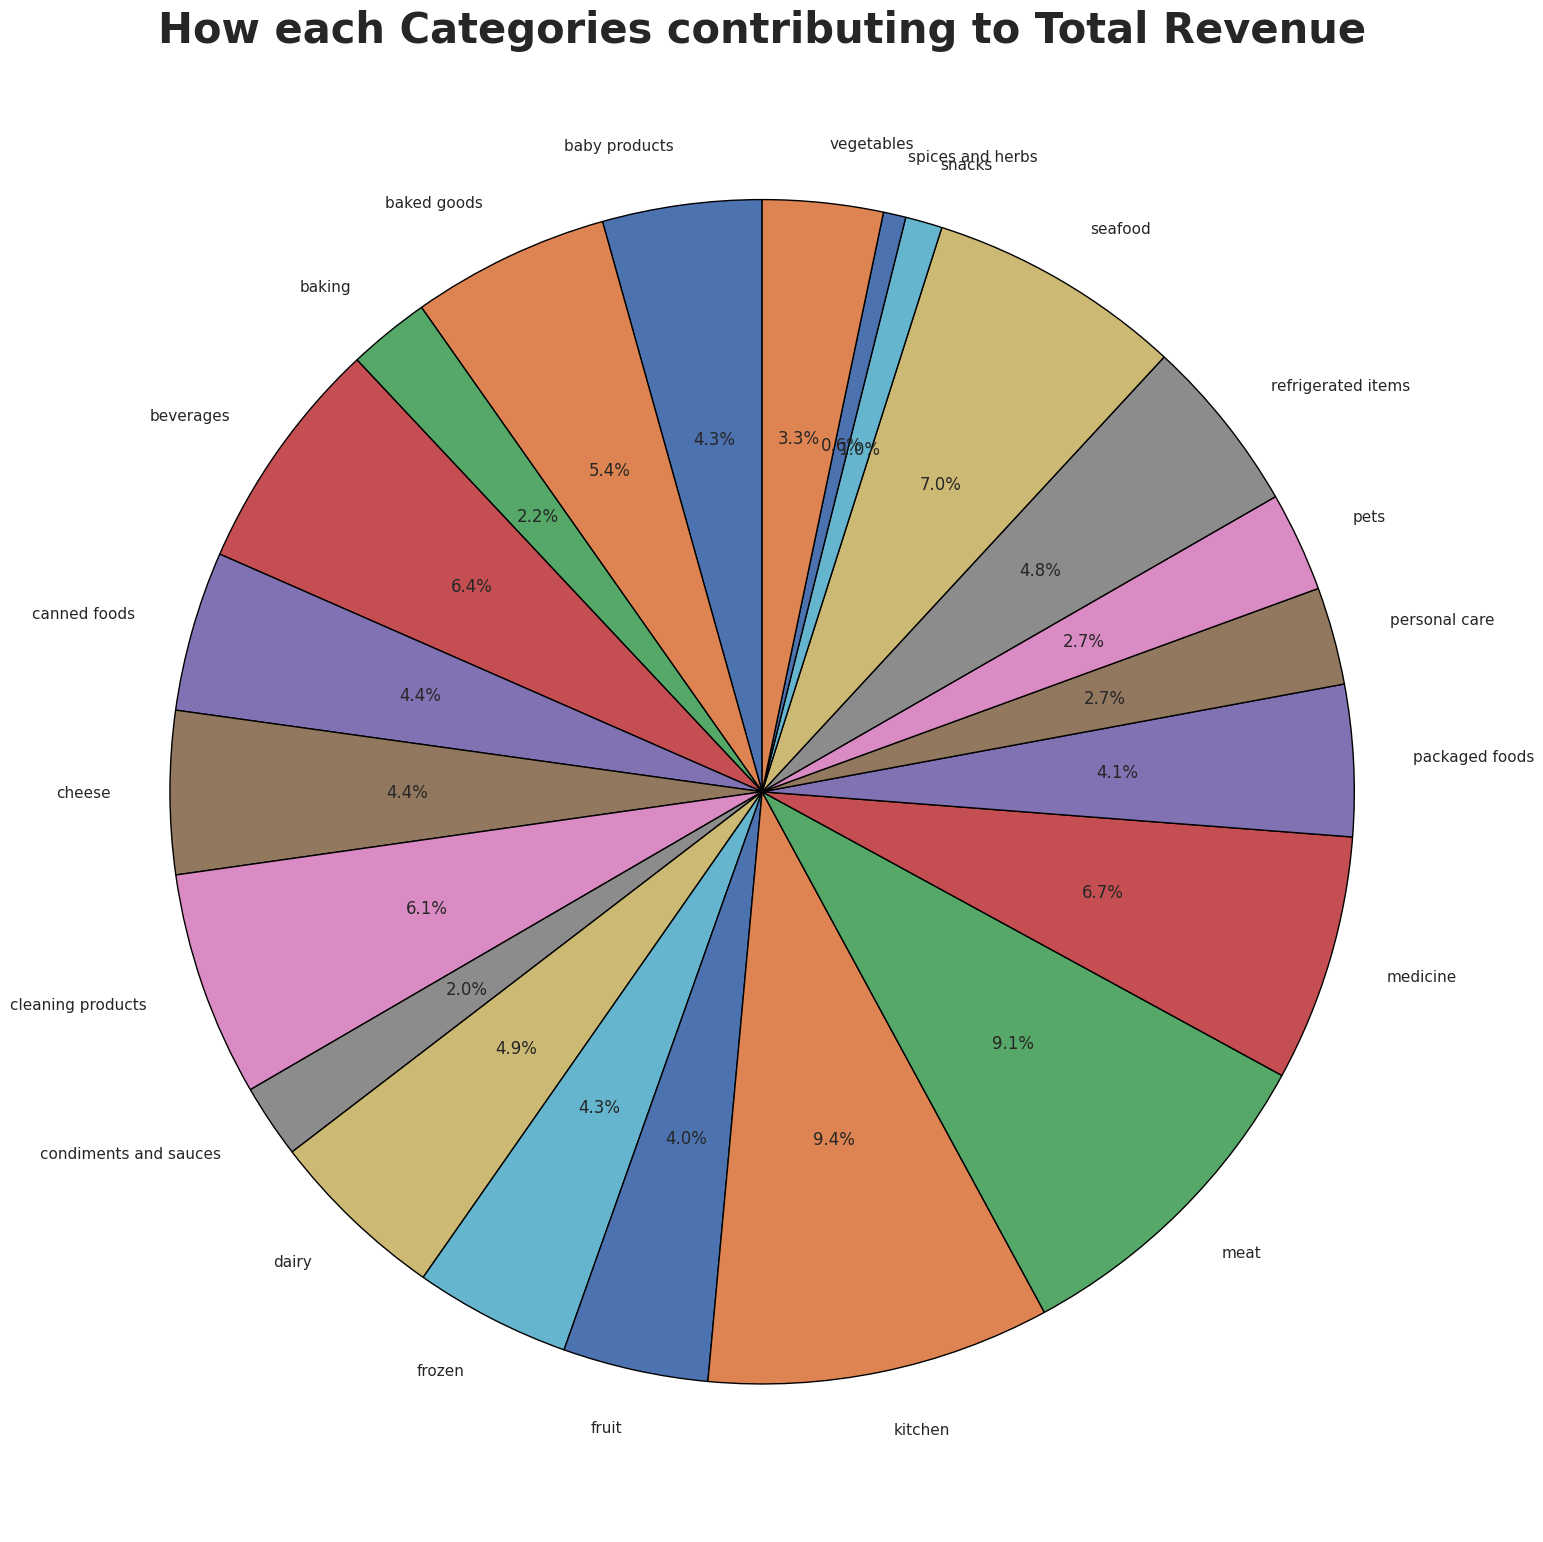

In [24]:
data = df.total.groupby(df.category).sum()
plt.figure(figsize=(16,16))
plt.pie(x=data,labels=data.index,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('How each Categories contributing to Total Revenue',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 16
plt.tight_layout()

In [25]:
counts = df['category'].value_counts()

counts_df_brand = pd.DataFrame({'Product':counts.index,'Counts':counts.values})[:10]
px.bar(data_frame=counts_df_brand,
 x='Product',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Brand Items based on Item Counts')

In [31]:
most_SALE=df.groupby(["category"])["total"].max().sort_values(ascending=False)[:10]
most_SALE

,total
category,
medicine,95.96
meat,81.96
seafood,81.96
beverages,80.76
kitchen,76.76
cleaning products,68.76
personal care,67.96
baby products,63.96
cheese,59.96


LEAST ONCE

In [ ]:
most=df.groupby(["category"])["timestamp"].max().sort_values(ascending=False)[:10]
most

,timestamp
category,
personal care,07-03-2022 9:59
canned foods,07-03-2022 9:59
dairy,07-03-2022 9:59
baby products,07-03-2022 9:58
baked goods,07-03-2022 9:58
packaged foods,07-03-2022 9:58
cleaning products,07-03-2022 9:57
baking,07-03-2022 9:56
seafood,07-03-2022 9:56


In [ ]:
TOP RECENTLY SOLD PRODUCTS USED FOR DATA FRESHNESS

In [32]:
most=df.groupby(["category"])["timestamp"].min().sort_values(ascending=False)[:10]
most

,timestamp
category,
medicine,01-03-2022 11:02
baby products,01-03-2022 10:24
refrigerated items,01-03-2022 10:20
meat,01-03-2022 10:16
dairy,01-03-2022 10:14
beverages,01-03-2022 10:11
cheese,01-03-2022 10:11
baking,01-03-2022 10:10
snacks,01-03-2022 10:09


LEAST RECENTLY SOLD PRODUCTS USED FOR DATA FRESHNESS

In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
outlet_size_sales = df.groupby("customer_type")[["total"]].sum().reset_index()
outlet_size_sales.sort_values(by=['total'],ascending=[False])

,customer_type,total
2,non-member,31755.240
3,premium,31655.680
4,standard,31388.780
1,gold,29939.990
0,basic,29569.160


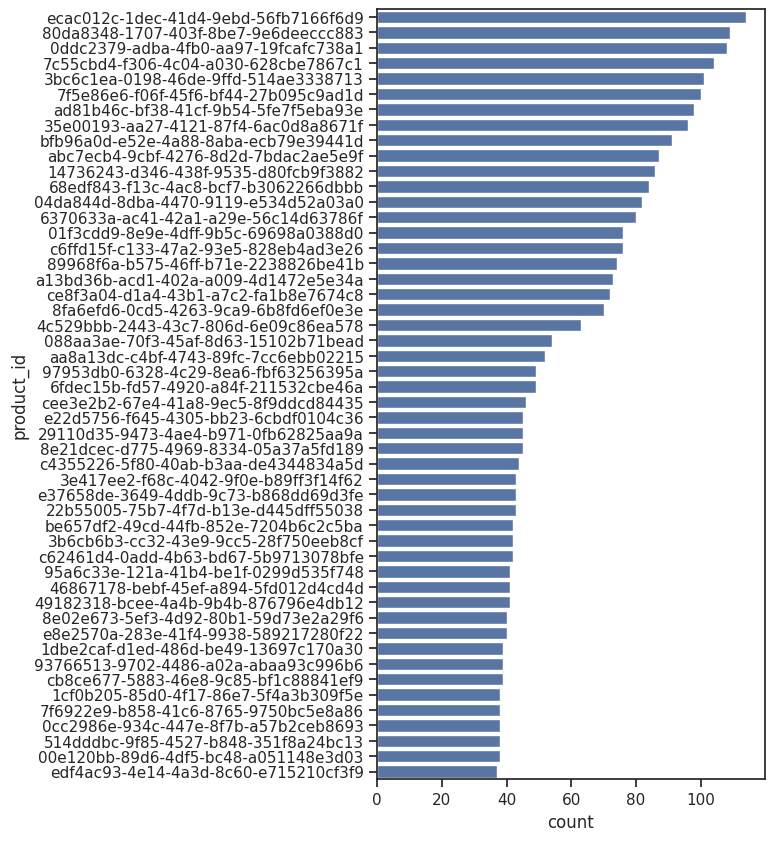

In [34]:
p_id=df.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

In [35]:
df.timestamp.describe()

,timestamp
count,7829
unique,3759
top,02-03-2022 10:59
freq,8


In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("sales.csv")

# Ensure timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggregate data by week (adjust if your data requires daily or monthly aggregation)
df_weekly = df.set_index('timestamp').resample('W').sum().reset_index()

# Feature Engineering
# 1. Date-based features
df_weekly['year'] = df_weekly['timestamp'].dt.year
df_weekly['month'] = df_weekly['timestamp'].dt.month
df_weekly['week'] = df_weekly['timestamp'].dt.isocalendar().week

# 2. Lagged Features (last week's sales)
df_weekly['lag_1'] = df_weekly['total'].shift(1)
df_weekly['lag_2'] = df_weekly['total'].shift(2)
df_weekly['lag_3'] = df_weekly['total'].shift(3)

# 3. Rolling Mean for smoother trend (last 4 weeks)
df_weekly['rolling_mean_4'] = df_weekly['total'].rolling(window=4).mean()

# Remove initial rows with NaN values due to shifting and rolling operations
df_weekly.dropna(inplace=True)

# Target variable
X = df_weekly[['year', 'month', 'week', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_4']]
y = df_weekly['total']

# Train-test split (use a time-based split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check data shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (18, 7), Test shape: (5, 7)


 data preparation and feature engineering steps to analyze and model weekly sales data

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 6100.358899999997
Root Mean Squared Error: 8846.477437821497


USED RANDOM FOREST

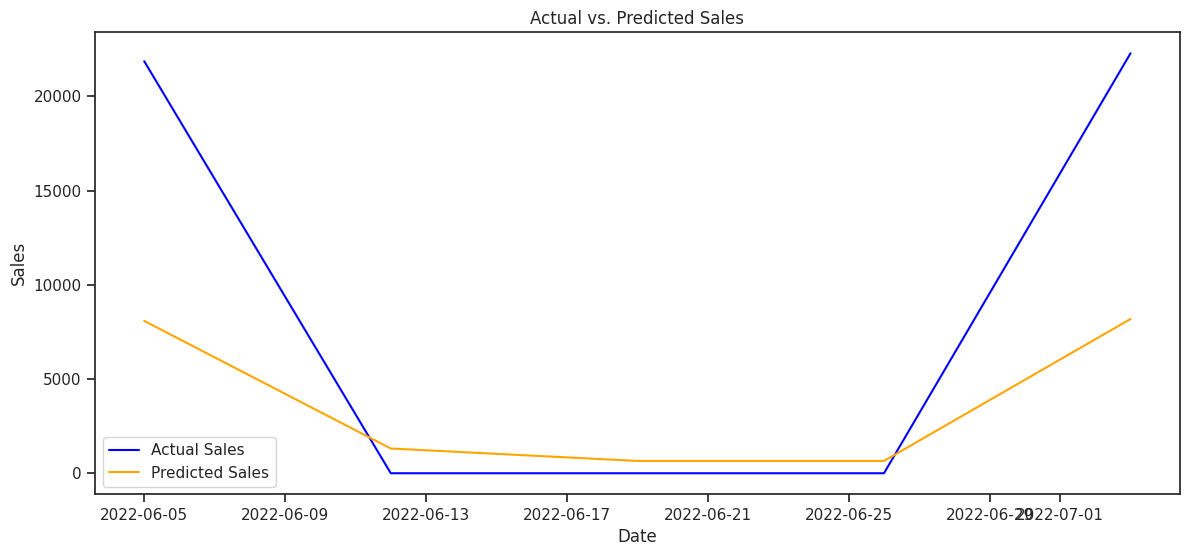

In [43]:
# Plot actual vs. predicted
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['timestamp'][-len(y_test):], y_test, label="Actual Sales", color='blue')
plt.plot(df_weekly['timestamp'][-len(y_test):], y_pred, label="Predicted Sales", color='orange')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()


In [46]:
# Take the last row in X_train + X_test and create a loop to predict future sales
future_weeks = 10
future_predictions = []

last_row = X.iloc[-1:].copy()

for i in range(future_weeks):
    # Predict and store the result
    pred = model.predict(last_row)[0]
    future_predictions.append(pred)

    # Update `last_row` with the new prediction for next iteration
    last_row['lag_3'] = last_row['lag_2']
    last_row['lag_2'] = last_row['lag_1']
    last_row['lag_1'] = pred
    last_row['rolling_mean_4'] = (last_row['lag_1'] + last_row['lag_2'] + last_row['lag_3'] + pred) / 4

# Display future predictions
print("Future Sales Predictions:", future_predictions)


Future Sales Predictions: [8186.619700000005, 8007.487100000001, 8430.512700000003, 8430.512700000003, 8430.512700000003, 8430.512700000003, 8430.512700000003, 8430.512700000003, 8430.512700000003, 8430.512700000003]


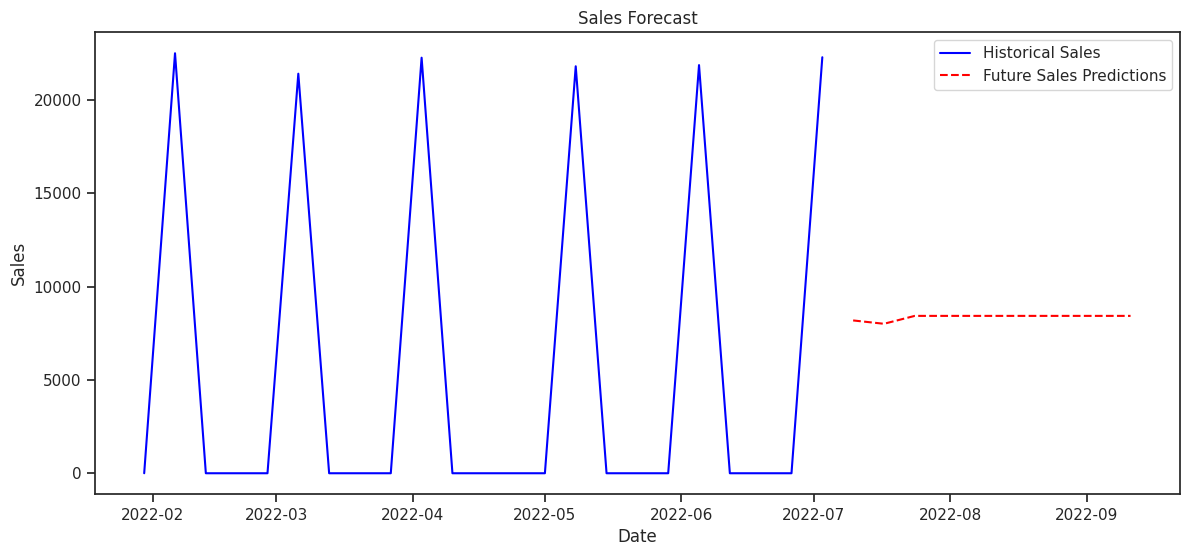

In [47]:
# Extend the timeline for future predictions
future_dates = pd.date_range(df_weekly['timestamp'].max(), periods=future_weeks + 1, freq='W')[1:]
future_df = pd.DataFrame({'timestamp': future_dates, 'predicted_sales': future_predictions})

plt.figure(figsize=(14, 6))
plt.plot(df_weekly['timestamp'], df_weekly['total'], label="Historical Sales", color='blue')
plt.plot(future_df['timestamp'], future_df['predicted_sales'], label="Future Sales Predictions", color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast")
plt.legend()
plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7pfz3is/dfc5u59r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7pfz3is/13q3gyem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62494', 'data', 'file=/tmp/tmpq7pfz3is/dfc5u59r.json', 'init=/tmp/tmpq7pfz3is/13q3gyem.json', 'output', 'file=/tmp/tmpq7pfz3is/prophet_model0nbtxcvi/prophet_model-20250106110123.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


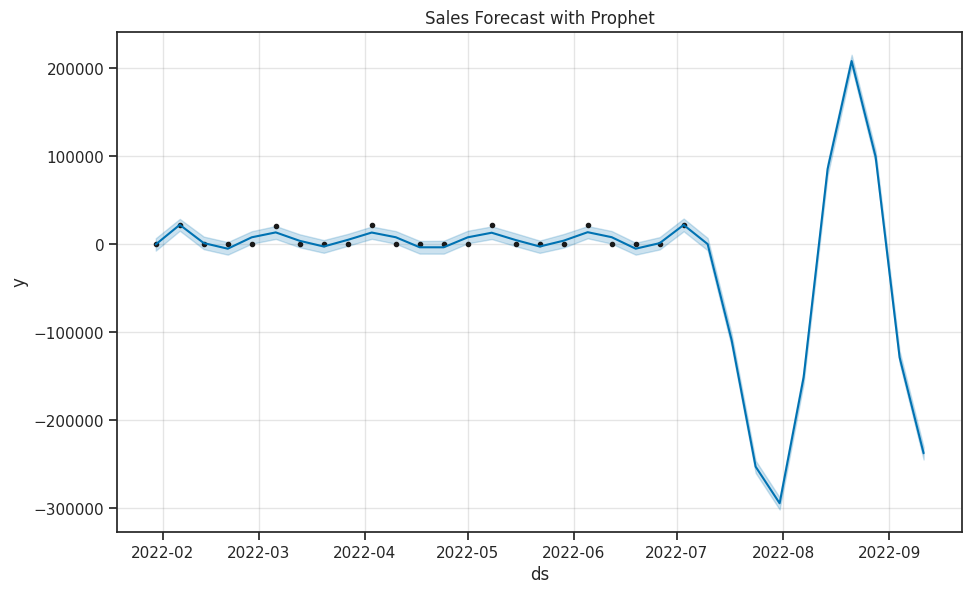

In [49]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df_weekly[['timestamp', 'total']].rename(columns={'timestamp': 'ds', 'total': 'y'})

# Initialize and fit Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(df_prophet)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=10, freq='W')
forecast = prophet_model.predict(future)

# Plot results
prophet_model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.show()


 the Prophet model for time series forecasting, which is specifically designed to handle seasonality and trends in data.

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2200 - val_loss: 0.4769
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2175 - val_loss: 0.4635
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2120 - val_loss: 0.4504
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2068 - val_loss: 0.4373
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1986 - val_loss: 0.4241
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1953 - val_loss: 0.4110
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1900 - val_loss: 0.3977
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1884 - val_loss: 0.3845
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1849 - val_loss: 0.3712
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.1777 - val_loss: 0.3578
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1731 - val_loss: 0.3444
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1719 - val_los

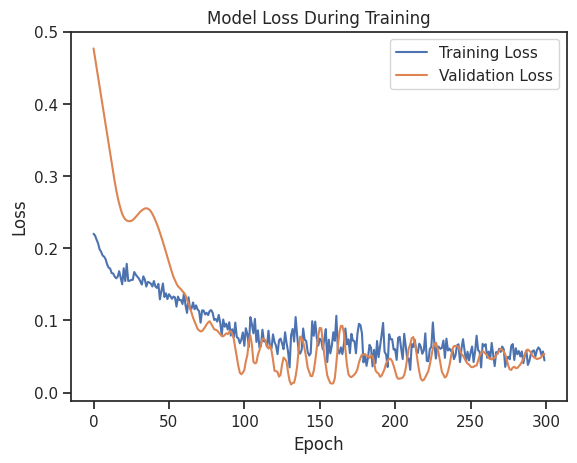

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


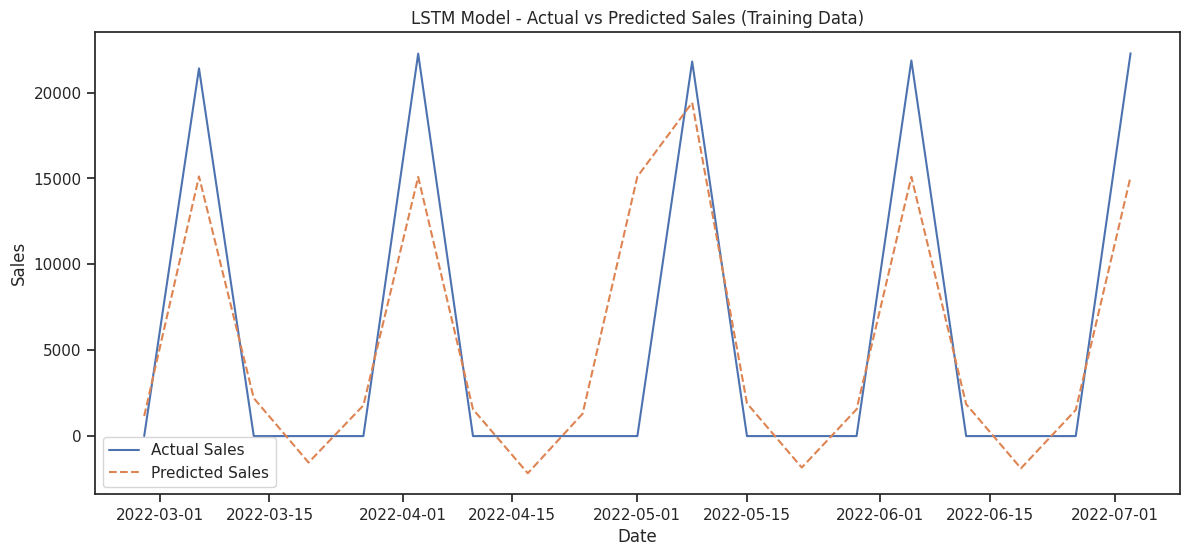

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


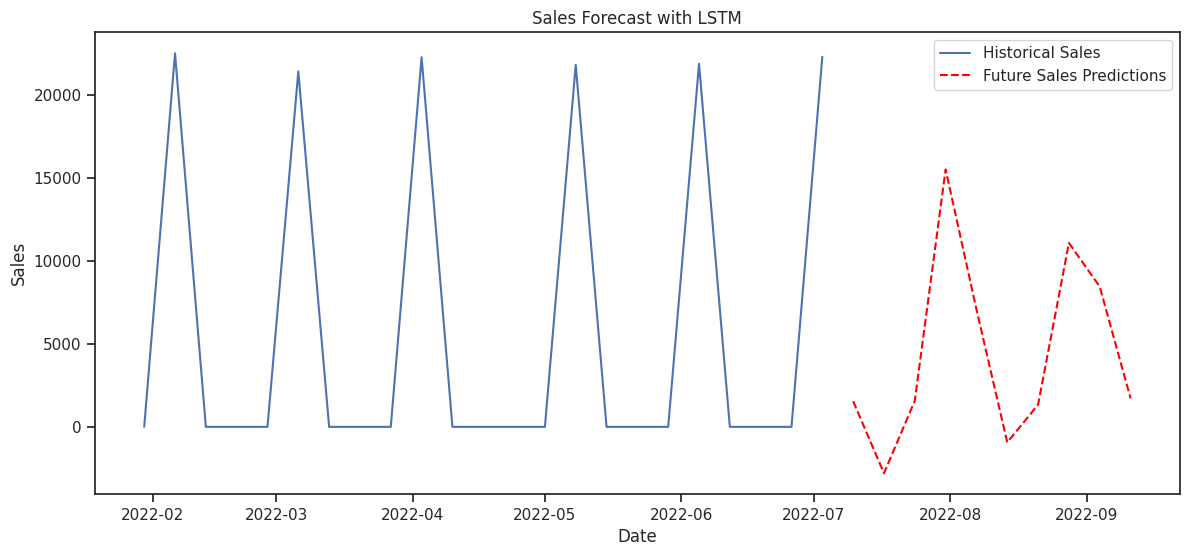

In [50]:
# Long Short-Term Memory (LSTM) neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale data (ensures data is between 0 and 1, which helps the LSTM model converge)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_weekly[['total']])

# Prepare data for LSTM
window_size = 4  # Number of previous weeks used to predict the next week's sales
X_lstm, y_lstm = [], []

for i in range(window_size, len(scaled_data)):
    X_lstm.append(scaled_data[i-window_size:i, 0])  # Input sequence
    y_lstm.append(scaled_data[i, 0])  # Target value (next week)

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))  # Reshape for LSTM input

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model_lstm.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))  # Output layer with a single unit for regression

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
history = model_lstm.fit(X_lstm, y_lstm, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Predict on the training set to see how well the model fits past data
y_pred_lstm_train = model_lstm.predict(X_lstm)
y_pred_lstm_train = scaler.inverse_transform(y_pred_lstm_train)  # Rescale back to original values
y_lstm_actual = scaler.inverse_transform(y_lstm.reshape(-1, 1))  # Rescale actual values for comparison

# Plot predictions vs. actuals for training data
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['timestamp'][window_size:], y_lstm_actual, label="Actual Sales")
plt.plot(df_weekly['timestamp'][window_size:], y_pred_lstm_train, label="Predicted Sales", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("LSTM Model - Actual vs Predicted Sales (Training Data)")
plt.legend()
plt.show()

# Forecast future sales
future_steps = 10  # Number of future weeks to predict
future_predictions = []

last_sequence = scaled_data[-window_size:]  # Take the last window_size weeks from training data as input

for _ in range(future_steps):
    # Predict the next week based on the last known sequence
    prediction = model_lstm.predict(last_sequence.reshape(1, window_size, 1))
    future_predictions.append(prediction[0, 0])  # Store the predicted value

    # Update the sequence by removing the first value and adding the predicted value
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse transform future predictions to get them back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a timeline for future predictions
future_dates = pd.date_range(df_weekly['timestamp'].max() + pd.Timedelta(weeks=1), periods=future_steps, freq='W')

# Plot historical data along with future predictions
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['timestamp'], df_weekly['total'], label="Historical Sales")
plt.plot(future_dates, future_predictions, label="Future Sales Predictions", linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast with LSTM")
plt.legend()
plt.show()


The model trains an LSTM neural network on weekly sales data to forecast future sales.
It generates predictions for the training data and compares them with actual sales to assess how well it has learned the pattern.
Finally, it forecasts sales for the next 10 weeks.

In [54]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the data
X = df_weekly[['year', 'month', 'week', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean_4']]
y = df_weekly['total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the model
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred_xgb = xgboost_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost MAE: {mae_xgb}, RMSE: {rmse_xgb}")


XGBoost MAE: 273.0409080429075, RMSE: 449.6401338942878


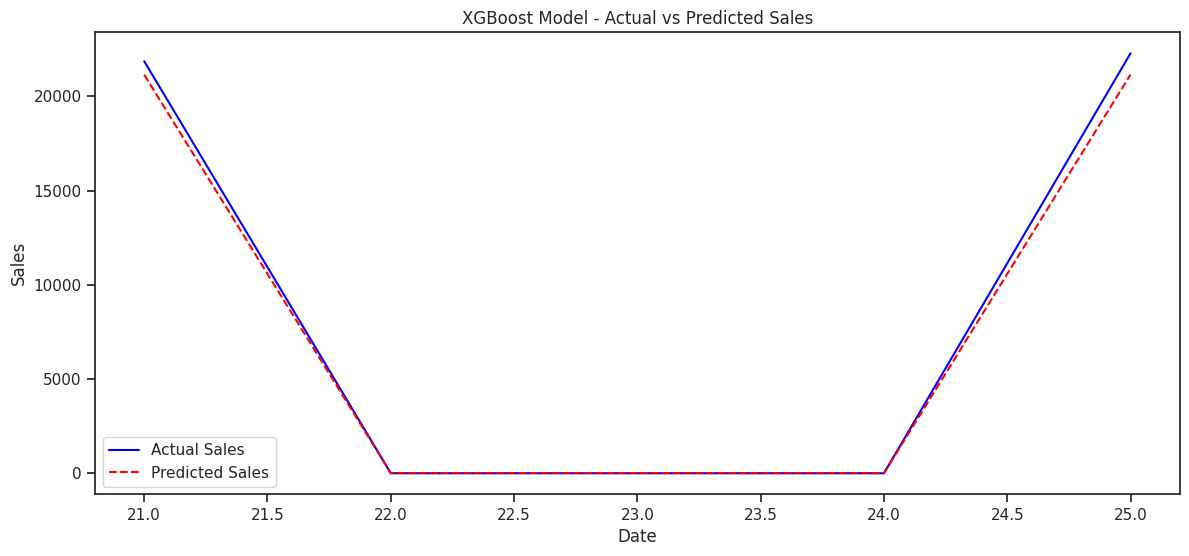

In [60]:
# Plot predictions vs actuals
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label="Actual Sales", color='blue')
plt.plot(y_test.index, y_pred_xgb, label="Predicted Sales", color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("XGBoost Model - Actual vs Predicted Sales")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



23   22287.170
24   22287.170
25   22287.170
26   22287.170
27   22287.170
28   22287.170
29   22287.170
30   22287.170
31   22287.170
32   22287.170
Name: predicted_mean, dtype: float64


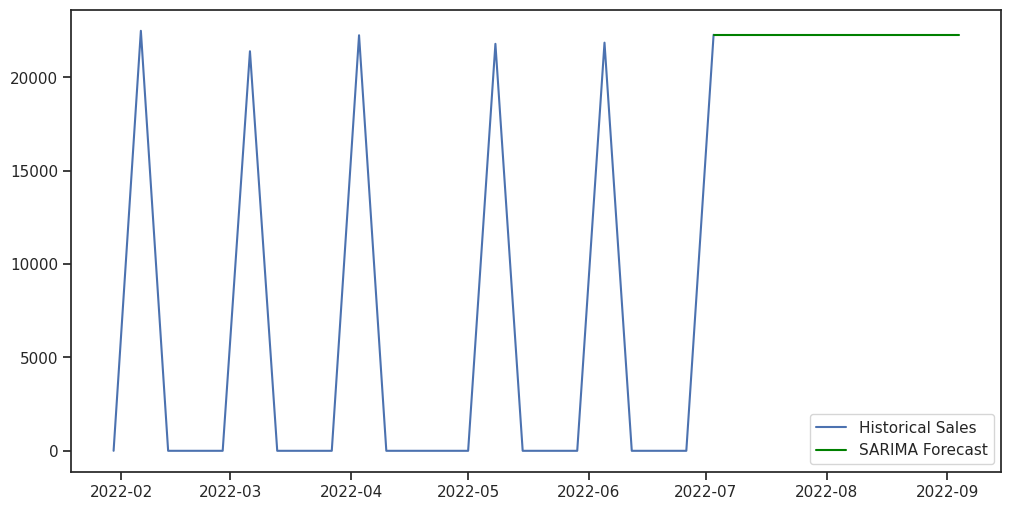

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters (p, d, q) * (P, D, Q, S) based on data seasonality
sarima_model = SARIMAX(df_weekly['total'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_results = sarima_model.fit()

# Forecasting
forecast_sarima = sarima_results.forecast(steps=10)
print(forecast_sarima)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekly['timestamp'], df_weekly['total'], label="Historical Sales")
plt.plot(pd.date_range(df_weekly['timestamp'].iloc[-1], periods=10, freq='W'), forecast_sarima, label="SARIMA Forecast", color='green')
plt.legend()
plt.show()


In [62]:
!pip install tbats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00


[5753.03283785 5753.03283785 5753.03283785 5753.03283785 5753.03283785
 5753.03283785 5753.03283785 5753.03283785 5753.03283785 5753.03283785]


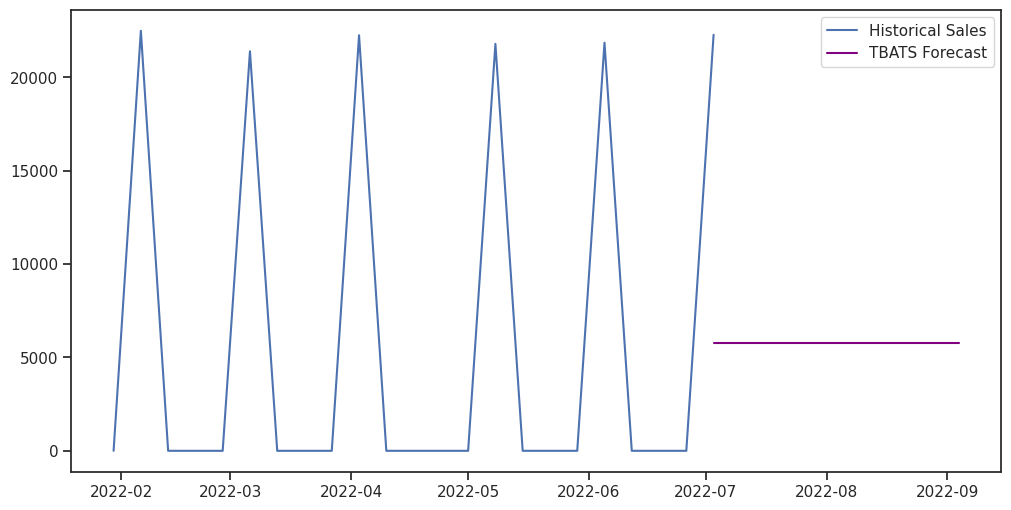

In [63]:
from tbats import TBATS

# Fit TBATS model
tbats_model = TBATS(seasonal_periods=[52]).fit(df_weekly['total'])  # Weekly seasonality

# Forecast
forecast_tbats = tbats_model.forecast(steps=10)
print(forecast_tbats)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekly['timestamp'], df_weekly['total'], label="Historical Sales")
plt.plot(pd.date_range(df_weekly['timestamp'].iloc[-1], periods=10, freq='W'), forecast_tbats, label="TBATS Forecast", color='purple')
plt.legend()
plt.show()

result is st line due to less data and over fitting or just taking the avg value

In [64]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 43.5 MB/s eta 0:00:00


In [ ]:
#!pip install --upgrade --force-reinstall torch torchvision torchaudio

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 95.652% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as W-SUN
INFO:NP.df_utils:Dataframe freq automatically defined as W-SUN
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number                     for the learning rate finder (202). The results might not be optimal.


Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 95.652% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 95.652% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-SUN
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-SUN
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 96.97% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 96.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-SUN
INFO:NP.df_utils:Defined frequency is equal to major frequency - W-SUN
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 96.97% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 96.97% of the data.
INFO - (NP.df_utils._inf

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


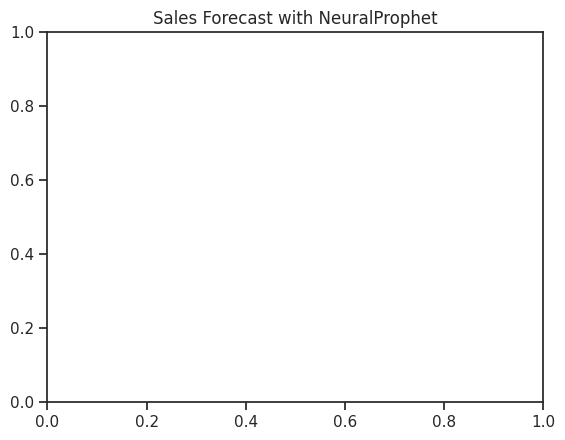

In [65]:
from neuralprophet import NeuralProphet

# Prepare data for NeuralProphet
df_neural = df_weekly[['timestamp', 'total']].rename(columns={'timestamp': 'ds', 'total': 'y'})

# Initialize and train NeuralProphet model
neuralprophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True)
neuralprophet_model.fit(df_neural)

# Make future predictions
future = neuralprophet_model.make_future_dataframe(df_neural, periods=10, n_historic_predictions=len(df_neural))
forecast_neural = neuralprophet_model.predict(future)

# Plot results
neuralprophet_model.plot(forecast_neural)
plt.title("Sales Forecast with NeuralProphet")
plt.show()
